<h1 style="text-align: center">
Machine Learning HW1 </br>
MLE & MAP in Python
</h1>

#### Name: Ehasan Hassanbeygi

#### Std. Number: 402211723

## Objective
This exercise will help you gain a deeper understanding of, and insights into, Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation$\textit{Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) }$ :) \\
Let’s say you have a barrel of apples that are all different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, all you have is a broken scale. answer the questions below.

1) For the sake of this section, lets imagine a farmer tells you that the scale returns the weight of the object with an error of +/- a standard deviation of 5g. We can describe this mathematically as:
$$
measurement = weight + \mathcal{N}(0, 5g)
$$
You can weigh the apple as many times as you want, so weigh it 100 times.
plot its histogram of your 100 measurements. (y axis is the counts and x-axis is the measured weight)

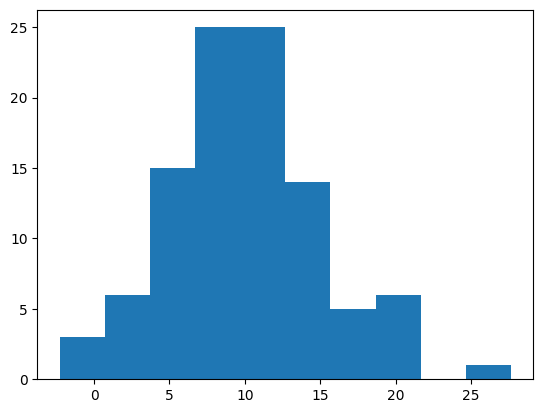

In [1]:
import numpy as np
import matplotlib.pyplot as plt


real_w = 10
measurements = []
for i in range(100):
        measurements.append(real_w + np.random.normal(loc=0, scale=5))

# alternative way
# measurements = np.random.normal(loc=real_w, scale=5, size=100)

plt.hist(measurements)
plt.show()

2) Find the average weight of the apple.
Is it a good guess? state your reason.

In [2]:
print(f'average weight of measurements is: {np.mean(measurements)}')

average weight of measurements is: 10.089641359675968


### (2)
We are approximating the real weight by considering a fixed amout of samples. So the quality of our guess heavily depends on the number of samlpes observed so far.
If our observed samples are biased or we simply do not have enough of them, then our approximation is going to be poor. But if it meets the requirements of our problem (good amount of independent/unbiased samples) then it can be a good guess.

3) we are going to use grid approximation for calculating the MLE. here is the link if you wnat to get more fimilar with this technique:
https://www.bayesrulesbook.com/chapter-6

Our end goal is to find the weight of the apple, given the data we have. To formulate it in a Bayesian way: We’ll ask what is the probability of the apple having weight, $w$, given the measurements we took, $X$. And, because we're formulating this in a Bayesian way, we use Bayes’ Law to find the answer:

$$
P(w|X) = \frac{P(X|w)P(w)}{P(X)}
$$

If we make no assumptions about the initial weight of our apple, then we can drop $P(w)$. We’ll say all sizes of apples are equally likely (we’ll revisit this assumption in the MAP approximation).

Furthermore, we’ll drop $P(X)$ - the probability of seeing our data. This is a normalization constant and will be important if we do want to know the probabilities of apple weights. But, for right now, our end goal is to only to find the most probable weight. $P(X)$ is independent of $w$, so we can drop it if we’re doing relative comparisons.

This leaves us with $P(X|w)$, our likelihood, as in, what is the likelihood that we would see the data, $X$, given an apple of weight $w$. If we maximize this, we maximize the probability that we will guess the right weight.

The grid approximation is probably the simplest way to do this. Basically, we’ll systematically step through different weight guesses, and compare what it would look like if this hypothetical weight were to generate data. We’ll compare this hypothetical data to our real data and pick the one that matches the best.

To formulate this mathematically:

For each of these guesses, we’re asking "what is the probability that the data we have, came from the distribution that our weight guess would generate". Because each measurement is independent from another, we can break the above equation down into finding the probability on a per measurement basis:

$$
P(X|w) = \prod_{i}^{N} p(x_i|w)
$$

So, if we multiply the probability that we would see each individual data point - given our weight guess - then we can find one number comparing our weight guess to all of our data.

The peak in the likelihood is the weight of the apple.

To make it computationally easier,

$$
\log P(X|w) = \log \prod_{i}^{N} p(x_i|w) = \sum_{i}^{N} \log p(d_i|w)
$$



a) Why did we use log likelihood? Is it ok to do so?

b) do the grid approximation and complete the cell below

### (3.a)
We have two reasons to use log likelihood instead of likelihood itself
- likelihood is $P(X|w) = \prod_{i=1}^{N} p(x_i|w)$ so if he have a lot of samples then we are multiplying a lot of small values ($\leq 1$) and eventually they will vanish. so we use logarithm and add the values instead

- also if we want to calculate $\hat{w}$ by  solving $\frac{\partial likelihood}{\partial w} = 0$, our calculations may be hard. so based on the distribution of $P(X|w)$ getting the logarithm may help us by making our calculations easier


Doing so is allowed because the logarithm is a monotonically increasing function.This means it won't change the peaks of the original function. Whatever $\hat{w}$ maximizes likelihood will also maximize log likelihood

In [3]:
from scipy.stats import norm
import numpy as np

weight_grid = np.linspace(0, 100)

ll_list = np.asarray(
    [norm(weight_guess, 10).logpdf(measurements).sum() for weight_guess in weight_grid])
print(weight_grid[np.argmax(ll_list)])

"""
# Calculate the maximum likelihood estimate of a parameter in a normal distribution.
# First calculate the log likelihoods for a range of weight guesses.
# For each weight guess, assume that the data comes from a normal distribution with that mean and a standard deviation of 10.
# Then calculate the log of the probability density function (pdf) of the data under this assumption.
# The sum of these log pdf values is the total log likelihood for that weight guess.
# After calculating the log likelihoods for all weight guesses, find the weight guess with the maximum log likelihood.
# This is the maximum likelihood estimate of the weight.
"""

10.204081632653061


'\n# Calculate the maximum likelihood estimate of a parameter in a normal distribution.\n# First calculate the log likelihoods for a range of weight guesses.\n# For each weight guess, assume that the data comes from a normal distribution with that mean and a standard deviation of 10.\n# Then calculate the log of the probability density function (pdf) of the data under this assumption.\n# The sum of these log pdf values is the total log likelihood for that weight guess.\n# After calculating the log likelihoods for all weight guesses, find the weight guess with the maximum log likelihood.\n# This is the maximum likelihood estimate of the weight.\n'

Play around with the code and try to answer the following questions regarding MLE and MAP. You can draw plots to visualize as well.

In [6]:
import numpy as np
from scipy.stats import norm, invgamma


# The barrel of apples
# The average apples is between 70-100 g
BARREL = np.random.normal(loc=85, scale=20, size=100)
# Grid
WEIGHT_GUESSES = np.linspace(1, 200, 100)
ERROR_GUESSES = np.linspace(.1, 50, 100)

# NOTE: Try changing the scale error
# in practice, you would not know this number
SCALE_ERR = 5

# NOTE: Try changing the number of measurements taken
N_MEASURMENTS = 10

# NOTE: Try changing the prior values and distributions
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)

LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)


def read_scale(apple):
    return apple + np.random.normal(loc=0, scale=SCALE_ERR)


def get_log_likelihood_grid(measurments):
    log_liklelihood = [
        [
            norm(weight_guess, error_guess).logpdf(measurments).sum()
            for weight_guess in WEIGHT_GUESSES
        ]
        for error_guess in ERROR_GUESSES
    ]
    return np.asarray(log_liklelihood)

def get_mle(measurements):
    ll_grid = get_log_likelihood_grid(measurements)
    sigma_hat_index, mu_hat_index = np.unravel_index(
        np.argmax(ll_grid), ll_grid.shape)
    
    return WEIGHT_GUESSES[mu_hat_index]

    """
    Calculate the log-likelihood for each measurement in the grid.
    Find the index of the maximum log-likelihood in the grid.
    Return the weight guess corresponding to the maximum log-likelihood.
    """


def get_map(measurements):
    ll_grid = get_log_likelihood_grid(measurements)
    sigma_hat_index, mu_hat_index = np.unravel_index(
        np.argmax(ll_grid + LOG_PRIOR_GRID), ll_grid.shape)
    
    return WEIGHT_GUESSES[mu_hat_index]

    """
    Calculate the log-likelihood for each measurement in the grid.
    Add the log prior to the log likelihood to get the log posterior.
    Find the index of the maximum log posterior in the grid.
    Return the weight guess corresponding to the maximum log posterior.
    """


# Pick an apple at random
apple = np.random.choice(BARREL)

# weight the apple
measurements = np.asarray([read_scale(apple) for _ in range(N_MEASURMENTS)])

print(f"Average measurement: {measurements.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurements):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurements):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

Average measurement: 89.511 g
Maximum Likelihood estimate: 89.444 g
Maximum A Posterior estimate: 51.253 g
The true weight of the apple was: 91.187 g


<h3><i><i> Questions</h3>
1.
How sensitive is the MAP measurement to the choice of prior?

### (1)
It's so sensetive to the choice of prior distribution. forexample in your code, you initialized the prior to have 
$$\mu=50 , \sigma = 1$$
which means that we have prior knowledge that the weights are around 50g and we are also sure of it (because the standard deviation is so small).
So MAP estimation behaves poorly due to inaccurate prior data and will return something around 50g.
But if we set the prior knowledge based on the real data (distribution of the barrel) it will behave so much better. Forexample just by increasing the standard deviation from 1 to 20, the results of MAP estimation almost became the same as MLE.

In the general case MAP estimation has the potential to be better than MLE, becuase it doesn't only rely on the observations and includes some domain knowledge in its estimation.

<h3><i><i></h3>
2. How sensitive is the MLE and MAP answer to the grid size?


### (2)

In general the space for $\theta$ is $R^2$ but we are sampling this space and only testing limited combinations of ($\mu , \sigma$).
Imagine that the theoretical $\hat{\theta}$ is somewhere in that space, our method is just picking the $\theta$ in our grid that is the closest to the theoretical $\hat{\theta}$.

If we increase the size of our grid, we are going to have closer points to the real estimations to pick from. So MLE and MAP are sensitive to the grid size in the way that if we increse it, we will have more accurate estimations and as the grid size increases, our estimations get closer to the theoretical formula for MLE and MAP.
